In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [8]:
# Save references to each table
measurements = Base.classes.measurement
stations = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#see table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
#see column names of measurement table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
most_rec_date = session.query(measurements.date).order_by(measurements.date.desc()).first().date
most_rec_date

'2017-08-23'

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_rec_date = session.query(measurements.date).order_by(measurements.date.desc()).first().date

# Calculate the date one year from the last date in data set.
rec_twelve_months = dt.datetime.strptime(most_rec_date, '%Y-%m-%d') - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
sel = [measurements.date,measurements.prcp]

year_results = session.query(*sel).filter(measurements.date >= rec_twelve_months).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(year_results, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
sorted_df = df.sort_values(by='date')
sorted_df


,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [20]:
start = '2015-01-01'
date_range = dt.datetime.strptime(start, '%Y-%m-%d')
date_range


datetime.datetime(2015, 1, 1, 0, 0)

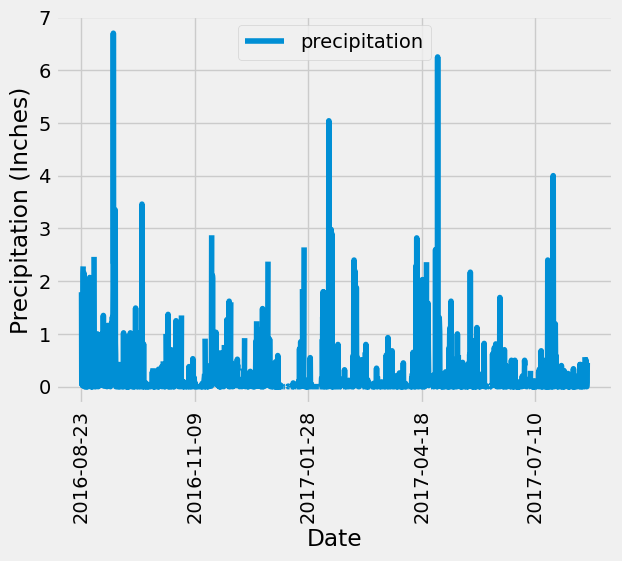

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot()
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
station_no = session.query(measurements.station).group_by(measurements.station).count()
station_no

9

In [232]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

sel_station = [measurements.station,func.count(measurements.station)]

station_count = session.query(*sel_station).group_by(measurements.station).\
                order_by(func.count(measurements.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [233]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel_stats = [func.min(measurements.tobs),func.max(measurements.tobs),func.avg(measurements.tobs)]

station_stats = session.query(*sel_stats).filter(measurements.station == 'USC00519281').all()
station_stats


[(54.0, 85.0, 71.66378066378067)]

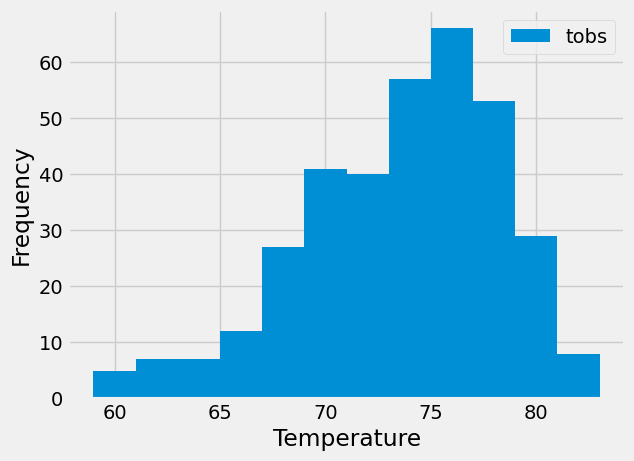

In [234]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_sel = [measurements.tobs]
temp_results = session.query(*temp_sel).filter(measurements.date >= rec_twelve_months).\
               filter(measurements.station == 'USC00519281').all()

#import to dataframe for easy histogram generation
temp_df = pd.DataFrame(temp_results, columns=['tobs'])
temp_df.hist(bins=12,legend=True)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("")
plt.show()


# Close Session

In [235]:
# Close Session
session.close()